In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, interact, fixed
import numpy as np
from apng import APNG
from helpersFunctions import *


# Inspecting the Dicoms

In [2]:
import os
import pydicom
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
%matplotlib inline


from helpersFunctions import *


# Define your root directory
config = load_config("/home/heartvista/Documents/robert/ge3t_shim_tool/config.json")
root_dir = config["rootDir"] + '/data/52674'
date = 'fieldmaps are still wrong'

# Function to list all subdirectories in a directory
def list_subdirs(directory):
    subdirs = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    subdirs.sort(key=lambda f: int(f[1:]))
    return subdirs
    
# Function to list all DICOM files in a directory
def list_dicom_files(directory):
    dicom_files = [os.path.join(directory, f) for f in os.listdir(directory)]
    dicom_files.sort(key=lambda f: int(f.split('.')[-1]))
    return dicom_files
    
# Create interactive widgets
subdirs_dropdown = widgets.Dropdown(options=list_subdirs(root_dir), description='Subdirectory:')
dicom_slider = widgets.IntSlider(description='DICOM Image:', disabled=False)
output_widget = widgets.Output()
show_all_metadata_btn = widgets.Button(description='Show All Metadata')

# Function to display DICOM image and initial metadata
def display_image_and_metadata(file_path):
    with output_widget:
        clear_output(wait=True)
        ds = pydicom.dcmread(file_path)

        # Extract image dimensions and pixel spacing
        rows, cols = ds.Rows, ds.Columns
        try:
            pixel_spacing = ds.PixelSpacing  # [Row pixel spacing, Column pixel spacing]
            aspect_ratio = pixel_spacing[1] / pixel_spacing[0]
        except AttributeError:
            # Default pixel spacing to 1 if not available
            aspect_ratio = 1

        # Adjust figure size for better visibility
        # You can adjust these values as needed
        fig_size_width = 6
        fig_size_height = fig_size_width / aspect_ratio * (rows / cols)
        plt.figure(figsize=(fig_size_width, fig_size_height))

        plt.imshow(ds.pixel_array, cmap='gray', aspect=aspect_ratio)
        plt.axis('off')
        plt.show()
        
        # Display initial set of metadata
        print("Metadata:")
        for key in ['SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber']:
            if key in ds:
                print(f"{key}: {getattr(ds, key)}")

# Handler for 'Show All Metadata' button click
def on_show_all_metadata_btn_clicked(b):
    # Directly construct the file path from the current selections
    subdir_path = os.path.join(root_dir, subdirs_dropdown.value)
    dicom_files = list_dicom_files(subdir_path)  # Ensure this list is freshly generated
    if dicom_slider.value < len(dicom_files):  # Check to avoid index errors
        file_path = dicom_files[dicom_slider.value]
        ds = pydicom.dcmread(file_path)
        with output_widget:
            # Clear previous metadata display and only show all metadata
            # Consider commenting out the clear_output if you want to keep the image displayed
            # clear_output(wait=True)  
            print("\nAll Metadata:")
            for key in ds.dir():
                if key not in ['PixelData']:  # Exclude pixel data for brevity
                    try:
                        value = getattr(ds, key)
                        print(f"{key}: {value}")
                    except Exception as e:
                        print(f"Error displaying {key}: {e}")
    else:
        print("Selected DICOM file is out of the current list range.")

show_all_metadata_btn.on_click(on_show_all_metadata_btn_clicked)

# Function to update slider values based on subdirectory selection
def update_slider_options(*args):
    subdir_path = os.path.join(root_dir, subdirs_dropdown.value)
    dicom_files = list_dicom_files(subdir_path)
    dicom_slider.max = len(dicom_files) - 1  # Update slider range
    dicom_slider.value = 6  # Reset to first image
    if dicom_files:
        display_image_and_metadata(dicom_files[0])  # Display first image

subdirs_dropdown.observe(update_slider_options, 'value')

# Update the displayed image when the slider value changes
def on_slider_value_change(change):
    if change['new'] is not None:
        subdir_path = os.path.join(root_dir, subdirs_dropdown.value)
        dicom_files = list_dicom_files(subdir_path)
        selected_file_path = dicom_files[change['new']]
        display_image_and_metadata(selected_file_path)

dicom_slider.observe(on_slider_value_change, names='value')

# Layout the widgets
widgets_layout = widgets.VBox([subdirs_dropdown, dicom_slider, show_all_metadata_btn, output_widget])
display(widgets_layout)

# Initialize
update_slider_options()

In [9]:
# Function to mask phase image using magnitude image with a threshold
def mask(phase_img, magnitude_img, threshold):
    phase_img = phase_img / 10
    masked_img = np.where(magnitude_img >= threshold, phase_img, np.nan)  # Use np.nan for transparency
    return masked_img

for subdir in list_subdirs(root_dir):
    p = os.path.join(root_dir, subdir)
    d = list_dicom_files(p)[0]
    print(d)
    ds = pydicom.dcmread(d)
    print(getattr(ds, 'SeriesDescription'))

subdirs = list_subdirs(root_dir)
first_set = subdirs[3:-22]
second_set = subdirs[-22:]

/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28484/i4323033.MRDC.1
3-Plane Localizer
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28485/i4323069.MRDC.1
Calibration
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28486/i4323342.MRDC.1
st
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28487/i4323528.MRDC.1
nd
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28488/i4323694.MRDC.1
st
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28489/i4323869.MRDC.1
nd
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28490/i4324048.MRDC.1
st
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28491/i4324246.MRDC.1
nd
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28492/i4324410.MRDC.1
st
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28493/i4324596.MRDC.1
nd
/home/heartvista/Documents/robert/ge3t_shim_tool//data/52674/s28494/i4324799.MRDC.1
st
/home/heartvista/Do

# [Old work]
## characterizing performance of the shim driver


In [8]:
%matplotlib inline

debugging = False

if debugging:
    print(directories)

threshold = 0
date = 'feb29'
center_x = 128
center_y = 128

water_bgd = 's20279'
field_bgd = 's20280'

index_averages = []
indeces = []
labels = []

global_max, global_min = 800, -800 #compute_global_max_min(directories[1::2], directories[::2], threshold)

out = os.path.join("output", date)
if not os.path.exists(out):
    os.makedirs(out)

X = np.arange(256)
Y = np.arange(256)
X, Y = np.meshgrid(X,Y)
index = np.where((X-center_x)**2 + (Y-center_y)**2 <= 10)

for selected_index in range(15, 24):
    averages = []    
    labels = []
    saved_images = []
    zero_pix = pydicom.dcmread(list_dicom_files(os.path.join(root_dir, field_bgd))[selected_index]).pixel_array
    zero_pix_mask = pydicom.dcmread(list_dicom_files(os.path.join(root_dir, water_bgd))[selected_index]).pixel_array
    zero_pix = mask_phase_image(zero_pix, zero_pix_mask, threshold)
    
    for i, d in enumerate(second_set[1::2]):
        path = os.path.join(root_dir, d)
        mask_path = os.path.join(root_dir, first_set[i*2-1])
        field_ds = pydicom.dcmread(list_dicom_files(path)[selected_index])
        mask_pix = pydicom.dcmread(list_dicom_files(mask_path)[selected_index]).pixel_array
        if debugging:
            print(f"SeriesDescription: {getattr(field_ds, 'SeriesDescription')}")

        masked_field_pix = field_ds.pixel_array #mask_phase_image(field_ds.pixel_array, mask_pix, threshold)

        basis_pix = masked_field_pix - zero_pix

        fig, ax = plt.subplots(figsize=(8, 6))
        im = ax.imshow(basis_pix, cmap='gray', vmin=global_min, vmax=global_max)
        cbar = plt.colorbar(im)

        # Set colorbar tick labels to white
        cbar.ax.yaxis.set_tick_params(color='white')
        # Set the color of the tick labels to white
        plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

        # index 17 onward to just get the amp value from the dicom title
        title = getattr(field_ds, 'SeriesDescription')[10:]
        plt.title(title, color='white', size=10)
        plt.axis('off')

        output_path = os.path.join(out, f"second_set_index{selected_index}_{title}.png")
        fig.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
        saved_images.append(output_path)
        plt.close(fig)

        averages.append(np.mean(basis_pix[index]))
        labels.append(title)
    index_averages.append(averages)
    indeces.append(selected_index)
    apng_path = os.path.join(out, f"second_set_index_{selected_index}.apng")
    APNG.from_files(saved_images, delay=500).save(apng_path)
    print(f"Animated PNG saved: {apng_path}")

Animated PNG saved: output/feb29/second_set_index_15.apng
Animated PNG saved: output/feb29/second_set_index_16.apng
Animated PNG saved: output/feb29/second_set_index_17.apng
Animated PNG saved: output/feb29/second_set_index_18.apng
Animated PNG saved: output/feb29/second_set_index_19.apng
Animated PNG saved: output/feb29/second_set_index_20.apng
Animated PNG saved: output/feb29/second_set_index_21.apng
Animated PNG saved: output/feb29/second_set_index_22.apng
Animated PNG saved: output/feb29/second_set_index_23.apng


['-0.5A', '-0.4A', '-0.3A', '-0.2A', '-0.1A', '0.0A', '0.1A', '0.2A', '0.3A', '0.4A', '0.5A']
[315.04324324324324, 181.93513513513514, 99.55675675675676, 57.12432432432432, 34.31351351351351, 7.259459459459459, -12.443243243243243, -40.605405405405406, -64.28108108108108, -97.92972972972973, -112.6864864864865]


Text(0, 0.5, 'Hz')

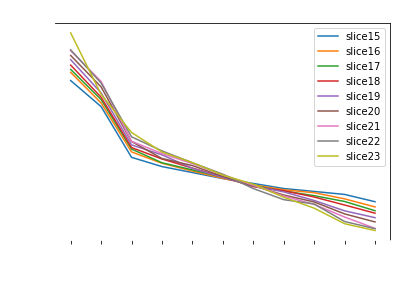

In [10]:
print(labels)
print(averages)

for i, averages in enumerate(index_averages):
    plt.plot(labels, averages, label=f"slice{indeces[i]}")
plt.title("Avg Current in center", color='white')
plt.legend()
plt.xticks(rotation=90, color='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().tick_params(axis='y', colors='white')  # Change y-tick labels to white if needed
plt.xlabel('current', color='white')
plt.ylabel('Hz', color='white')
